In [3]:
                                # ZONEAMENTO DE MARÉS #

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import plotly.express as px
%matplotlib inline
plt.rcParams['figure.figsize'] = (11,7)

In [103]:
Mares=pd.read_csv("Desktop/Boqueiraomod.txt")
Fiscal=pd.read_csv("Desktop/Fiscalmod.txt")

In [104]:
Mares["Boqueirao"]=100*Mares["Boqueirao"]
Mares["Fiscal"]=100*Fiscal["Fiscal"]
Mares

,Data,Hora,Boqueirao,Fiscal
0,01/01/2011,00:10,265.0,261.0
1,01/01/2011,00:20,265.0,262.0
2,01/01/2011,00:30,265.0,262.0
3,01/01/2011,00:40,265.0,262.0
4,01/01/2011,00:50,264.0,262.0
...,...,...,...,...
4458,31/01/2011,23:10,238.0,222.0
4459,31/01/2011,23:20,244.0,227.0
4460,31/01/2011,23:30,249.0,232.0
4461,31/01/2011,23:40,255.0,237.0


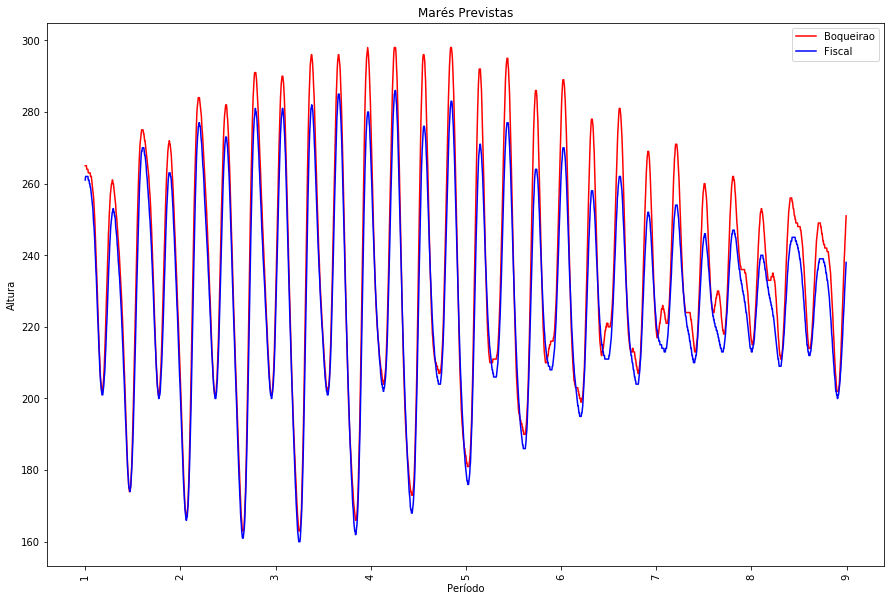

In [105]:
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(Mares.index[0:2000],Mares.iloc[0:2000,2],color="r",label="Boqueirao")
ax.plot(Mares.index[0:2000],Mares.iloc[0:2000,3],color="b",label="Fiscal")
ax.set_xlabel("Período")
ax.set_ylabel("Altura")
ax.set_title("Marés Previstas")
ax.set_xticklabels(Mares.index[0:2000], rotation=90)
ax.legend()

In [106]:
# Número de zonas
amp_boq=max(Mares["Boqueirao"])-min(Mares["Boqueirao"])
amp_fisc=max(Mares["Fiscal"])-min(Mares["Fiscal"])

k=max((amp_boq-amp_fisc),(2*10.3)) # Se "TRUE",há necessidade de Zoneamento
if k > 10 :
    print("Necessário Zoneamento")
else:
    print("Não há necessidade de zoneamento")

Necessário Zoneamento


In [107]:
# Definindo numero de Zonas , obtivemos 4 zonas 
p=(k/10 + 1)
num_zonas=round(p,0) + 1
print(num_zonas)

4.0


In [108]:
# Aplicando fator de correção
Mares["Zona 1"]= (2*Mares["Boqueirao"] + Mares["Fiscal"])/3
Mares["Zona 2"]=(Mares["Boqueirao"] + 2*Mares["Fiscal"])/3
Mares.head()


,Data,Hora,Boqueirao,Fiscal,Zona 1,Zona 2
0,01/01/2011,00:10,265.0,261.0,263.666667,262.333333
1,01/01/2011,00:20,265.0,262.0,264.000000,263.000000
2,01/01/2011,00:30,265.0,262.0,264.000000,263.000000
3,01/01/2011,00:40,265.0,262.0,264.000000,263.000000
4,01/01/2011,00:50,264.0,262.0,263.333333,262.666667


In [109]:
#Reogarnizando o DataFrame da direcao Estacao de Referencia -> Subordinada
Mares = Mares[['Data', 'Hora','Boqueirao','Zona 1', 'Zona 2','Fiscal' ]]

In [110]:
Mares.head()

,Data,Hora,Boqueirao,Zona 1,Zona 2,Fiscal
0,01/01/2011,00:10,265.0,263.666667,262.333333,261.0
1,01/01/2011,00:20,265.0,264.000000,263.000000,262.0
2,01/01/2011,00:30,265.0,264.000000,263.000000,262.0
3,01/01/2011,00:40,265.0,264.000000,263.000000,262.0
4,01/01/2011,00:50,264.0,263.333333,262.666667,262.0


In [111]:
#Horarios


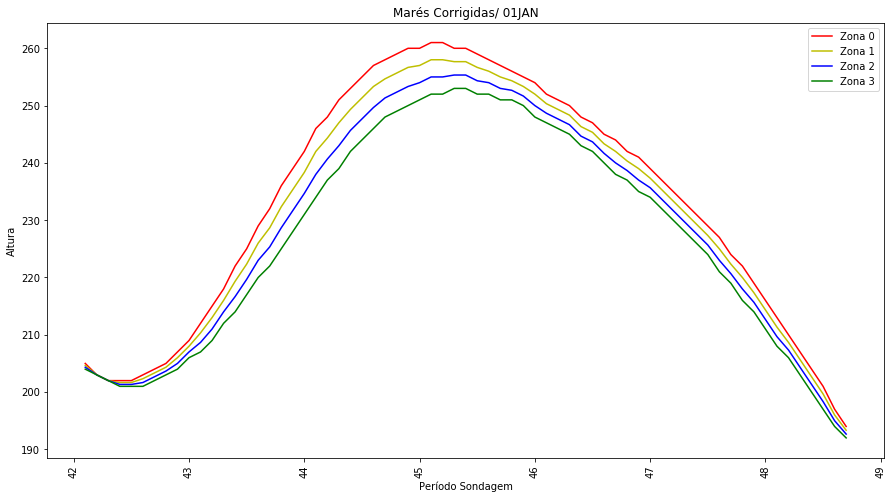

In [112]:
# Graficos Zonas / Para 1 dia

fig,ax=plt.subplots(figsize=(15,8))


    
        
ax.plot(Mares.index[41:108],Mares.iloc[41:108,2],color="r",label="Zona 0")
ax.plot(Mares.index[41:108],Mares.iloc[41:108,3],color="y",label="Zona 1")
ax.plot(Mares.index[41:108],Mares.iloc[41:108,4],color="b",label="Zona 2")
ax.plot(Mares.index[41:108],Mares.iloc[41:108,5],color="g",label="Zona 3")

ax.set_xlabel("Período Sondagem")
ax.set_ylabel("Altura")
ax.set_title("Marés Corrigidas/ 01JAN")
ax.set_xticklabels(Mares.index[41:108], rotation=90)
ax.legend()
    
        
    
    
    

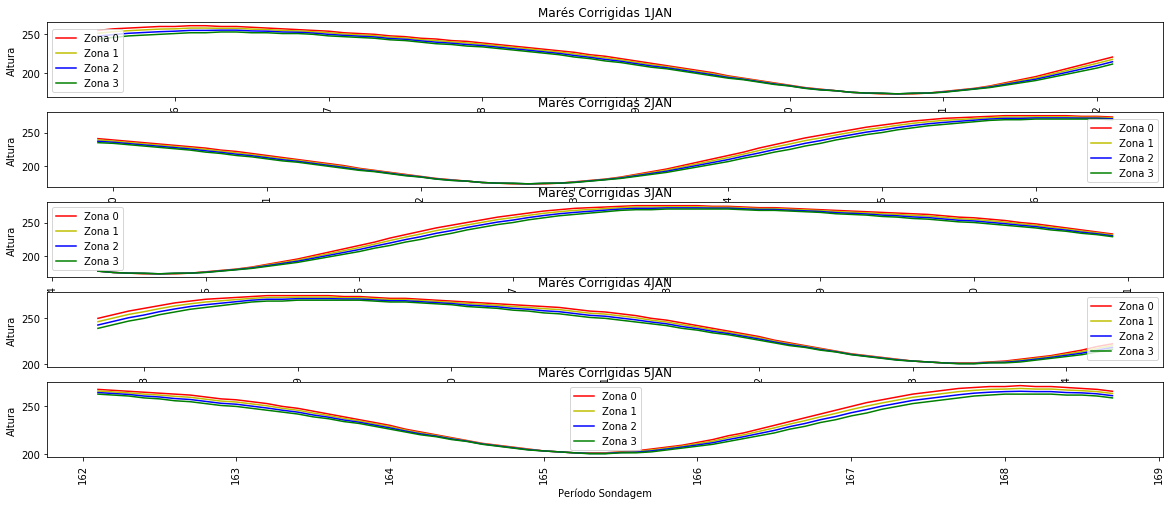

In [116]:
fig,ax=plt.subplots(5,1,figsize=(20,8))

h=41
h2=108

for l in range(5):
    
    h=h+24
    h2=h2+24
    
    ax[l].plot(Mares.index[h:h2],Mares.iloc[h:h2,2],color="r",label="Zona 0")
    ax[l].plot(Mares.index[h:h2],Mares.iloc[h:h2,3],color="y",label="Zona 1")
    ax[l].plot(Mares.index[h:h2],Mares.iloc[h:h2,4],color="b",label="Zona 2")
    ax[l].plot(Mares.index[h:h2],Mares.iloc[h:h2,5],color="g",label="Zona 3")

    ax[l].set_xlabel("Período Sondagem")
    ax[l].set_ylabel("Altura")
    ax[l].set_title("Marés Corrigidas " + str(l+1) + "JAN")
    ax[l].set_xticklabels(Mares.index[h:h2], rotation=90)
    ax[l].legend()
    
   
       
    
    
    